## 0. Getting 

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.13.0
torchvision version: 0.14.0


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the ml_helper directory, download it from GitHub if it doesn't work
try:
    from ml_helper import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find ml_helper scripts... downloading them from GitHub.")
    !git clone https://github.com/ngohongthai/ml_helper --branch pytorch-deep-learning
    from ml_helper import data_setup, engine

[INFO] Couldn't find ml_helper scripts... downloading them from GitHub.
Cloning into 'ml_helper'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 69 (delta 19), reused 59 (delta 12), pack-reused 0
Receiving objects: 100% (69/69), 14.58 MiB | 2.98 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get data

In [4]:
from ml_helper import utils

data_url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
data_dir = utils.download_data(data_url, "pizza_steak")
data_dir

[INFO] Did not find data/pizza_steak directory, creating one...
[INFO] Downloading pizza_steak.zip from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip...
[INFO] Unzipping pizza_steak.zip data...


PosixPath('data/pizza_steak')

In [5]:
utils.walk_through_dir(data_dir)

There are 250 images in 'data/pizza_steak/test/pizza'.
There are 250 images in 'data/pizza_steak/test/steak'.
There are 750 images in 'data/pizza_steak/train/pizza'.
There are 750 images in 'data/pizza_steak/train/steak'.


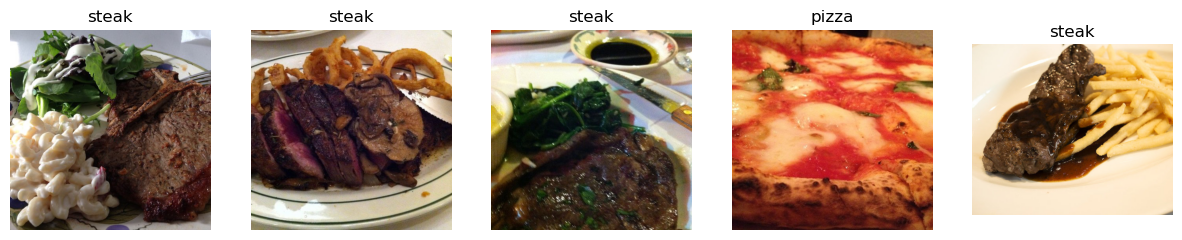

In [6]:
train_dir = data_dir/"train"
test_dir = data_dir/"test"

utils.plot_random_images(num_images=5, data_path=data_dir)

## 2. Create Datasets and Dataloaders

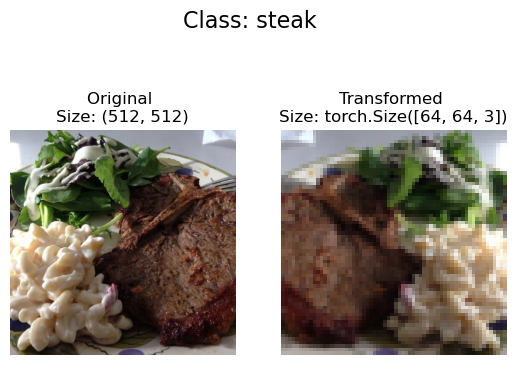

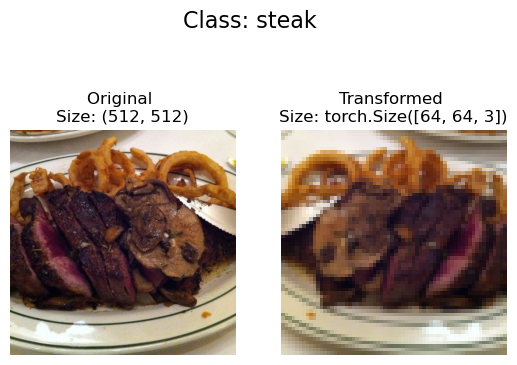

In [7]:
from ml_helper import data_setup

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

# Visualize the transformed images
utils.plot_transformed_images(num_images=2, data_path=data_dir, transform=data_transform)

In [8]:
train_data_loader, test_data_loader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir, 
    test_dir=test_dir, 
    transform=data_transform, 
    batch_size=32)
train_data_loader, test_data_loader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x120db18e0>,
 ['pizza', 'steak'])

## 3. Making a model

In [9]:
from ml_helper import model_builder

utils.set_seeds(42)
model0 = model_builder.TinyVGG(input_shape=3, 
                               hidden_units=10, 
                               output_shape=len(class_names)).to(device)

## 4. Start training

In [10]:
from ml_helper import engine

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

results = engine.train(model=model0,
                       train_dataloader=train_data_loader,
                       test_dataloader=test_data_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)
results

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6485 | train_acc: 0.6158 | test_loss: 0.4961 | test_acc: 0.7766


KeyboardInterrupt: 

## 5. Evaluate, test prediction and save the model

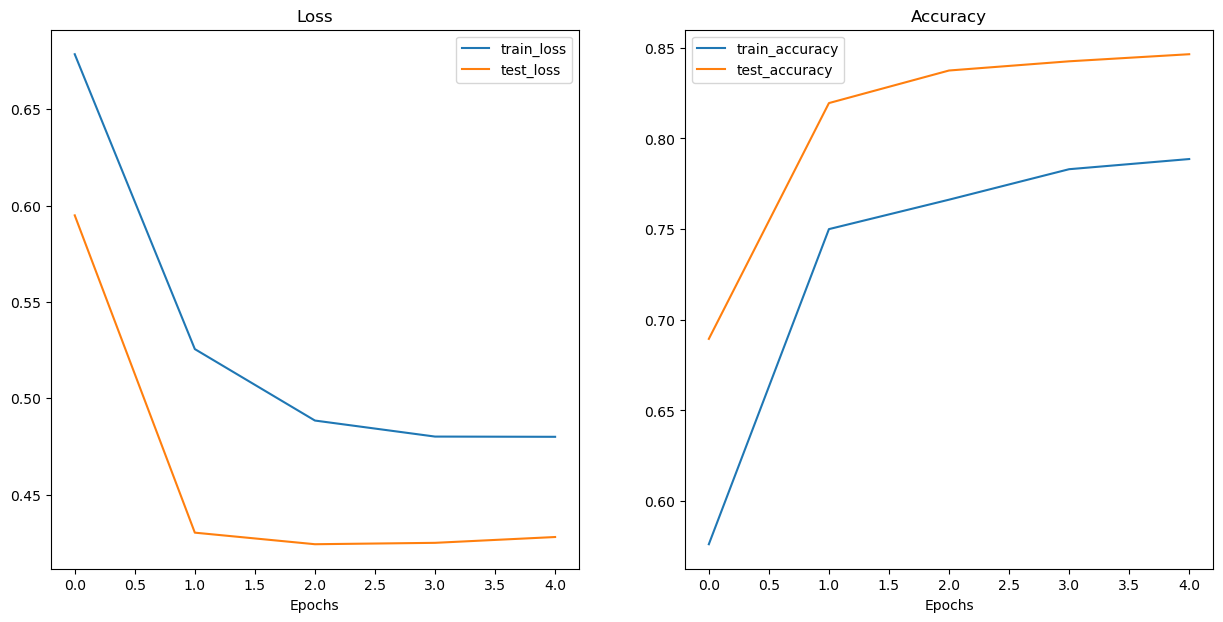

In [22]:
utils.plot_loss_curves(results)

In [23]:
# Thử tăng epochs lên 10
results = engine.train(model=model0,
                       train_dataloader=train_data_loader,
                       test_dataloader=test_data_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4587 | train_acc: 0.7933 | test_loss: 0.3960 | test_acc: 0.8492
Epoch: 2 | train_loss: 0.4336 | train_acc: 0.8036 | test_loss: 0.3696 | test_acc: 0.8492
Epoch: 3 | train_loss: 0.4257 | train_acc: 0.8066 | test_loss: 0.3520 | test_acc: 0.8512
Epoch: 4 | train_loss: 0.4172 | train_acc: 0.8127 | test_loss: 0.3735 | test_acc: 0.8355
Epoch: 5 | train_loss: 0.4254 | train_acc: 0.7983 | test_loss: 0.3692 | test_acc: 0.8207
Epoch: 6 | train_loss: 0.4373 | train_acc: 0.8018 | test_loss: 0.3830 | test_acc: 0.8465
Epoch: 7 | train_loss: 0.4205 | train_acc: 0.8100 | test_loss: 0.3685 | test_acc: 0.8305
Epoch: 8 | train_loss: 0.4080 | train_acc: 0.8255 | test_loss: 0.3472 | test_acc: 0.8648
Epoch: 9 | train_loss: 0.4037 | train_acc: 0.8275 | test_loss: 0.3671 | test_acc: 0.8523
Epoch: 10 | train_loss: 0.4034 | train_acc: 0.8188 | test_loss: 0.3564 | test_acc: 0.8602


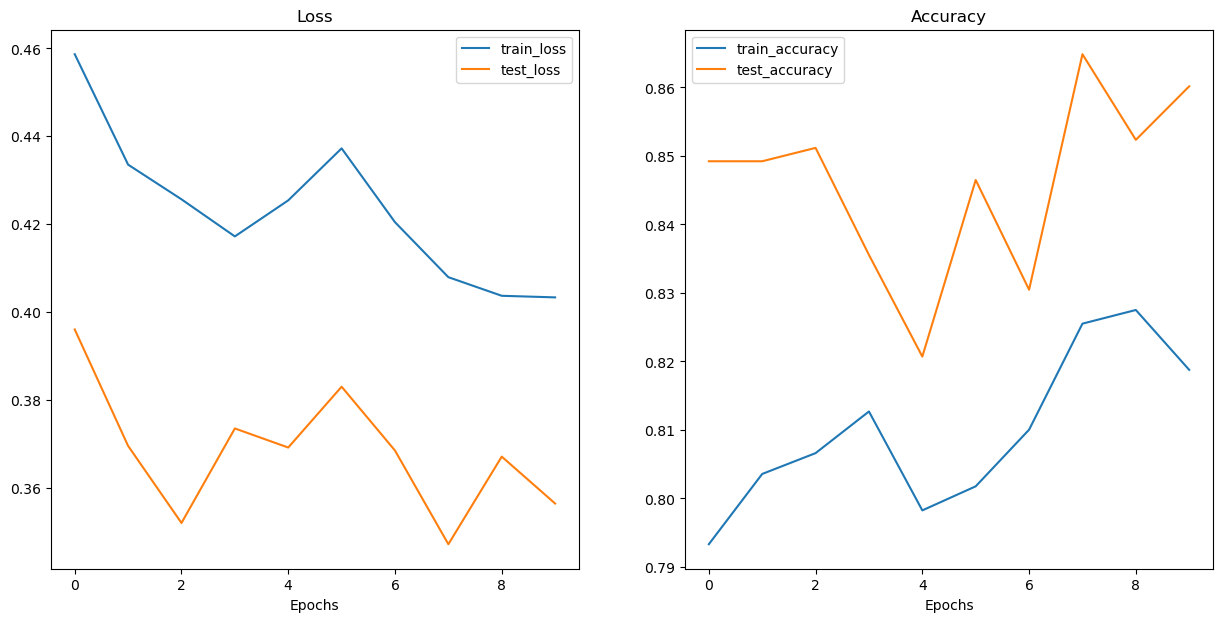

In [24]:
utils.plot_loss_curves(results)

--2022-12-20 22:17:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  3.69MB/s    in 0.5s    

2022-12-20 22:17:14 (3.69 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



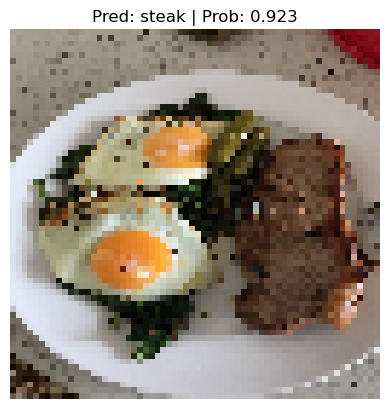

In [32]:
# Predict on a single image
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
utils.pred_and_plot_image(model= model0,
                          image_path= "03-steak.jpeg",
                          class_names= class_names,
                          transform=transforms.Resize((64, 64)),
                          device= device)

## 6.Save model

In [33]:
utils.save_model(model=model0,
               target_dir="models",
               model_name="tingvgg_model.pth")

[INFO] Saving model to: models/tingvgg_model.pth


## 7. Load model

In [35]:
loaded_model_0 = model_builder.TinyVGG(input_shape=3, 
                               hidden_units=10, 
                               output_shape=len(class_names)).to(device)
loaded_model_0.load_state_dict(torch.load("models/tingvgg_model.pth"))
loaded_model_0.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

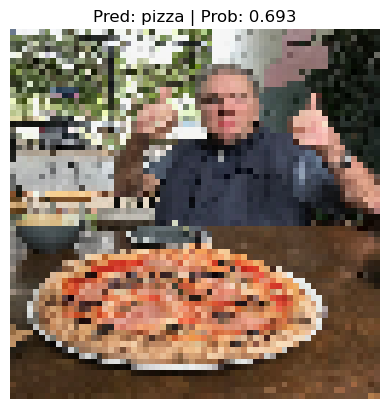

In [36]:
utils.pred_and_plot_image(model= loaded_model_0,
                          image_path= "03-pizza-dad.jpeg",
                          class_names= class_names,
                          transform=transforms.Resize((64, 64)),
                          device= device)